In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

In [33]:
#toy network
r1 = [1,0,0,0,0,0,0]
r2 =[-1,1,0,0,0,0,0]
r3 = [-1,0,1,0,0,0,-1]
r4= [0,-1,0,1,1,0,0]
r5 = [0,0,-1,0,1,1,1]
r6 = [0,0,0,-2,1,0,0]
r7 = [0,0,0,0,0,-1,-1]

S = np.array([r1,r2,r3,r4,r5,r6,r7]).T

Sb = S.astype('bool').astype('int')
RAG = np.matmul(Sb.T, Sb)
A = RAG.astype('bool').astype('int') - np.identity(RAG.shape[0])

G = nx.from_numpy_array(A)

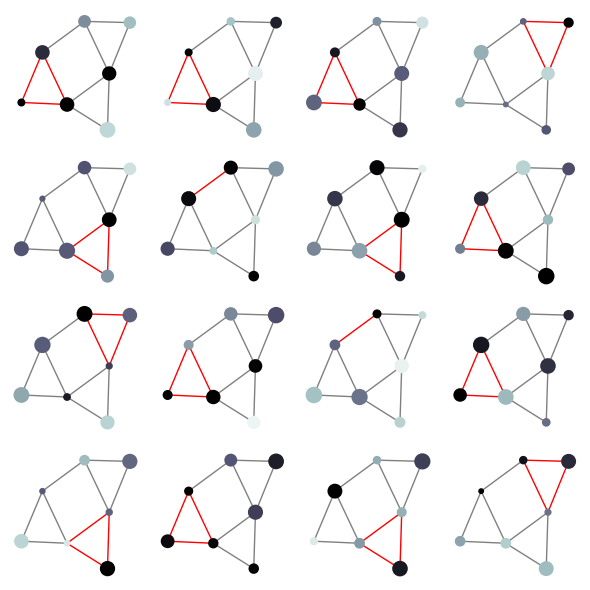

In [37]:
fig, axes = plt.subplots(4,4, figsize = (6,6))

for i, ax in enumerate(axes.flatten()):
    np.random.seed(seed=i)
    G = nx.from_numpy_array(A)
    ge = np.random.randint(5,100,7)
    
    G_exp = {}

    for n in list(G.nodes):
        G_exp[n] = int(np.random.randint(5,100,1))

    nx.set_node_attributes(G, G_exp, "G_exp")
    mw_nd, mw_wt = nx.max_weight_clique(G, weight="G_exp")
    
    g_color = ['red' if e[0] in mw_nd and e[1] in mw_nd else 'gray' for e in list(G.edges)]
    
    nx.draw_networkx(G, pos = nx.kamada_kawai_layout(G), with_labels = False, node_color=list(G_exp.values()), 
                 cmap = 'bone_r', vmin=0, linewidths= 2,edge_color= g_color,
                 node_size = ge, ax = ax)
    
    ax.set_axis_off()
    
fig.tight_layout()
#plt.savefig('toy_clique.pdf', dpi=300)